## Data Retrieval and first looks
The data retrieved is from a kaggle dataset and contains meteorlogical data from Portugal fire service

## Import the necessary packages


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/forestfires.csv')

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Data Understanding 
Column Names and meaning

1. X: x-axis spatial coordinate with the Montesinho park: 1 to 9
2. Y: y- axis spatial coordinate within the Montesinho park map : 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week : 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system : 18.7 - 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI indes from the FWI system: 0.0 to 56.10
9. temp- temperature in Celsius degrees: 2.2 to 33.30
10. RH- relative humidity in %: 15.0 to 100
11. wind- wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m^2: 0.0 to 6.4
13. area- the burned area of the forest in hecta-acres (ha): 0.00 to 1090.84 
(this output variable is very skewed towars 0.0, will likely need to do a logarithmic transformation

## Fun little Data Engineering moves
Before we run any models or get any statistics need to convert months and days into numerical data.

In [4]:
df.month.replace(('jan','feb','mar','apr','may','jun', 'jul', 'aug', 'sep','oct','nov','dec'), #convert months to integers
                 (1,2,3,4,5,6,7,8,9,10,11,12),
                 inplace = True )
df.day.replace(('sun','mon','tue','wed','thu','fri','sat'), 
               (1,2,3,4,5,6,7),
              inplace = True)    #convert days into integers


In [5]:
##check work
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Homies it's all 'bout that EDA

## Check for missing Values



In [6]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

## Check Check Checkin for duplicates ...

In [7]:
df.duplicated().sum()

4

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


Great we dont have any duplicates or any missing values at the moment. Before we run an FSM we first want to check to see the scale of our data, and check the assumptions of a linear regression model:

1. The relationship between X and the mean of y is linear
2. Homoscedasticity: the varieance of residual is the same for any value of X
3. Independence: X features are independent of each other
4. Normality: The residuals of the model are normally distributed.


## The first one we are going to check for is multi colinearity

We will do this by running a correlation matrix using the Pearson method.
But first lets split our data into target and label data.
Since we are trying to predict the area burned this will be our dependent, or target variable.
The rest will be our Independent variables, and hopefully they will truly be independent.

In [9]:
X = df.drop('area', axis=1)
y= df.area

In [10]:
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [11]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [12]:
X.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,3.972921,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,2.275990,2.143867,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


It appears possible that we may have to scale our data but we will not attempt this until after running our First Simple Model.

In [13]:
from scipy import stats
%matplotlib inline

In [14]:
df.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,0.013037,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.013085,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.037469,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,0.013037,-0.013085,-0.037469,1.000000,0.073597,0.028697,0.001913,0.035926,0.032233,-0.083318,-0.004013,-0.024119,0.048359
FFMC,-0.021039,-0.046308,0.291477,0.073597,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.028697,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.001913,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.035926,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.032233,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,-0.083318,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


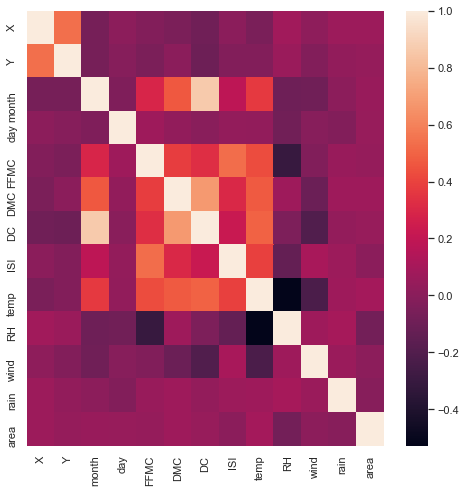

In [15]:
sns.set(rc={'figure.figsize': (8,8)})

sns.heatmap(df.corr());

In [16]:
df.corr()['area'].sort_values(ascending = False)

area     1.000000
temp     0.097844
DMC      0.072994
X        0.063385
month    0.056496
DC       0.049383
day      0.048359
Y        0.044873
FFMC     0.040122
wind     0.012317
ISI      0.008258
rain    -0.007366
RH      -0.075519
Name: area, dtype: float64

Text(0.5, 1.0, 'Area burned as a function of Temperature')

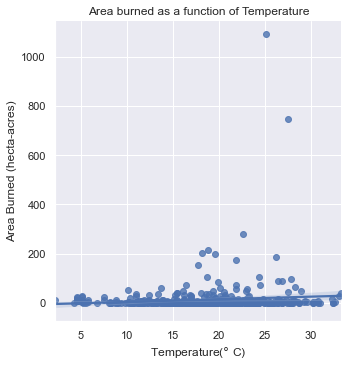

In [17]:
sns.lmplot(data=df, x='temp', y='area')
plt.xlabel('Temperature($\degree$ C)')
plt.ylabel('Area Burned (hecta-acres)')
plt.title('Area burned as a function of Temperature')

Text(0.5, 1.0, 'Area burned as a function of Relative Humidity')

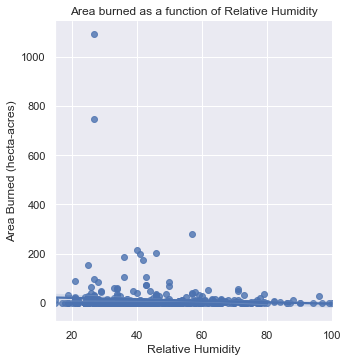

In [18]:
sns.lmplot(data=df, x='RH', y='area')
plt.xlabel('Relative Humidity')
plt.ylabel('Area Burned (hecta-acres)')
plt.title('Area burned as a function of Relative Humidity')

Let's logarithimically transform the target 'area'

In [19]:
import scipy

In [20]:
y_log_scaled = scipy.stats.lognorm.fit(y)
y_log_1=np.log(y+1)
y_log_1

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

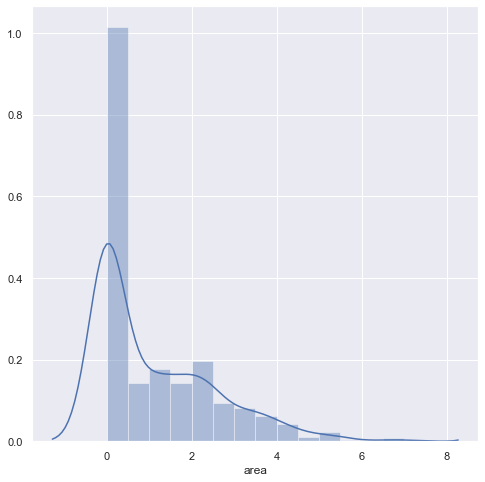

In [21]:
ax= sns.distplot(y_log_1)

highest correlation appears to be temperature so lets make an FSM that takes in area as dependent variable and temperature as a indepedent variable.

In [22]:
len(X.columns)

12

In [23]:
fire_area_preds = X.columns[:12]

In [24]:
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [25]:
import statsmodels.api as sm

In [26]:
model= sm.formula.ols(formula = 'y_log_1~X', data=df).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_log_1   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.987
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.159
Time:                        16:28:33   Log-Likelihood:                -905.47
No. Observations:                 517   AIC:                             1815.
Df Residuals:                     515   BIC:                             1823.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9361      0.138      6.759      0.000       0.664       1.208
X              0.0375      0.027      1.410      0.159      -0.015       0.090
==============================================================================
Omnibus:                       93.301   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.843
Skew:                           1.204   Prob(JB):                     1.58e-31
Kurtosis:                       3.887   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model_1=sm.formula.ols(formula= 'y_log_1~temp', data=df).fit()

In [29]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_log_1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.478
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.225
Time:                        16:28:33   Log-Likelihood:                -905.73
No. Observations:                 517   AIC:                             1815.
Df Residuals:                     515   BIC:                             1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8677      0.209      4.144      0.000       0.456       1.279
temp           0.0129      0.011      1.216      0.225      -0.008       0.034
==============================================================================
Omnibus:                       91.757   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.327
Skew:                           1.197   Prob(JB):                     9.18e-31
Kurtosis:                       3.831   Cond. No.                         67.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [32]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log_1, train_size= 0.9, random_state=42)

In [34]:
ss=StandardScaler()
X_train_scaled= pd.DataFrame(ss.fit_transform(X_train), columns= X_train.columns, index= X_train.index) 

In [35]:
X_test_scaled=pd.DataFrame(ss.fit_transform(X_test), columns= X_test.columns, index = X_test.index)

In [36]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [37]:
dtr.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor()>

In [38]:
dtr.score(X_train_scaled, y_train)

0.9943745499274044

In [39]:
y_hat = dtr.predict(X_test_scaled)

In [40]:
evaluation_df= pd.DataFrame({'Actual':y_test, 'Predicted':y_hat})
evaluation_df

,Actual,Predicted
304,0.000000,0.000000
501,0.000000,0.000000
441,0.802002,0.924259
153,0.900161,0.000000
503,1.081805,0.000000
131,0.000000,1.998774
204,2.707383,1.998774
512,2.006871,1.015231
325,0.000000,0.000000
247,0.559616,4.012592


In [41]:
rfc=RandomForestRegressor()

In [42]:
rfc.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [43]:
y_preds_rfc= rfc.predict(X_test_scaled)

In [44]:
rfc_eval_df= pd.DataFrame({'Actual':y_test, 'Predicted': y_preds_rfc})

In [45]:
rfc_eval_df

,Actual,Predicted
304,0.000000,0.960000
501,0.000000,0.752042
441,0.802002,1.204846
153,0.900161,1.470587
503,1.081805,2.235179
131,0.000000,0.723143
204,2.707383,1.240122
512,2.006871,1.013324
325,0.000000,1.292244
247,0.559616,1.010453


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters = {'max_depth':[3,5,7,9,11],
             'min_samples_leaf':[1,2,4],
             'min_samples_split':[2,5,10],
             'n_estimators':[10,25,75,100]}

In [48]:
grid_search= GridSearchCV(estimator =rfc, param_grid= parameters, cv=3)

In [49]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 25, 75, 100]})

In [50]:
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [51]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=3, n_estimators=10)

In [52]:
rfc_best= RandomForestRegressor(n_estimators=10, max_depth = 3, min_samples_leaf=2, min_samples_split =2)

In [53]:
rfc_best.fit(X_train_scaled, y_train)
y_preds_rfc_best = rfc_best.predict(X_test_scaled)

In [54]:
model_eval= pd.DataFrame({'Actual':y_test, 'Predicted':y_preds_rfc_best})
model_eval

,Actual,Predicted
304,0.000000,1.034800
501,0.000000,0.918340
441,0.802002,1.186130
153,0.900161,0.813015
503,1.081805,2.583304
131,0.000000,0.694317
204,2.707383,0.711811
512,2.006871,0.898911
325,0.000000,0.915777
247,0.559616,0.646196


In [55]:
df.shape

(517, 13)

In [56]:
len(df[df['area']==0])

247

In [57]:
len(df[df['area']> 0])

270

Looking at the models and the data, one thing thats going to be hard to get around is the fact that a lot of the wildfire incidents recorded have a negligent burn area, and are thus recorded as being zero. While its nice in reality that most wildfires are not so apocalyptic as they may seem, it poses a problem for us when it comes to modeling. 

Another way to look at this might be to break them up into categories, and break them up by their effect of devastation, low-impact, medium impact, large_impact, and devastating_impact. lets try it, what could it hurt?

In [62]:
y_categorical= pd.cut(df.area, bins=[0.0,0,250,500,1000], labels=['null','low','medium','high'])

ValueError: Bin edges must be unique: array([   0.,    0.,  250.,  500., 1000.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [59]:
y_categorical

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
512    low
513    low
514    low
515    NaN
516    NaN
Name: area, Length: 517, dtype: category
Categories (3, object): [low < medium < high]

In [60]:
df.area[0]

0.0

In [61]:
df.area[512]

6.44